# Inference: Neal Langevin MCMC

This example shows you how to perform Bayesian inference on a Gaussian distribution using [Neal Langevin MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).


First, we create a simple normal distribution

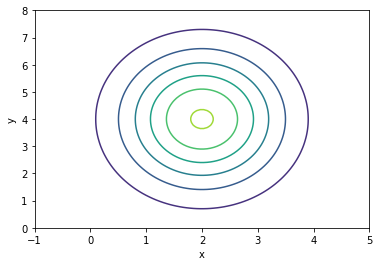

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
mean = [2, 4]
cov = [[1, 0], [0, 3]]
log_pdf = pints.toy.GaussianLogPDF(mean, cov)

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-1, 5, num_points)
y = np.linspace(-0, 8, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now we set up and run a sampling routine using the Neal Langevin MCMC

In [2]:
# Choose starting points for 3 mcmc chains
xs = [
    [2, 1],
    [3, 3],
    [5, 4],
]

# Set a standard deviation, to give the method a sense of scale
#sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.NealLangevinMCMC)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.7)
    sampler.set_alpha(0.95)
    sampler.set_delta(mean=0.05)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Neal Langevin MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.333     0.333     0.333      0:00.0
2     9      0.5       0.5       0.5        0:00.0
3     12     0.6       0.6       0.6        0:00.0
100   303    0.961     0.971     0.98       0:00.1
200   603    0.975     0.975     0.985      0:00.2
300   903    0.98      0.977     0.986755   0:00.2
400   1203   0.985     0.98      0.988      0:00.3
500   1503   0.986     0.982     0.988      0:00.4
600   1803   0.986711  0.983     0.988      0:00.5
700   2103   0.987     0.982906  0.988604   0:00.5
800   2403   0.989     0.985     0.989      0:00.6
900   2703   0.987     0.984     0.989      0:00.7
1000  3003   0.987     0.985     0.988024   0:00.7
1100  3303   0.986     0.985     0.989      0:00.8
1200  3603   0.987     0.985025  0.989      0:00.9
1300  3903   0.988     0.985     0.99       0:00

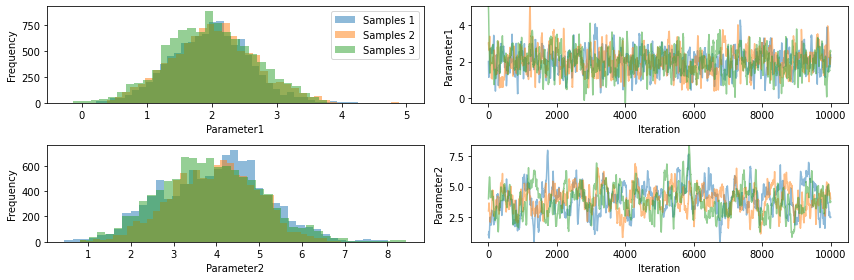

In [3]:
# Show traces and histograms
import pints.plot
pints.plot.trace(full_chains)
plt.show()

R-hat:
[1.0037001615279588, 1.00421206454155]
0.2913131495099299
0.3474467965607744
0.24053935957450112


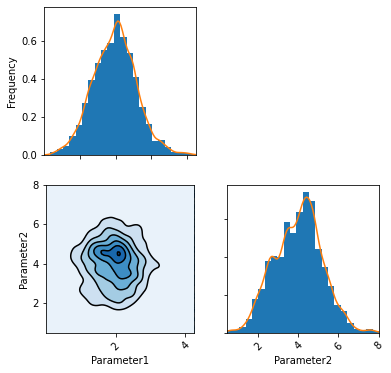

In [4]:
# Discard warm up
chains = full_chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

We see that the log-pdf could be reasonably well recovered.

## Neal Langevin MCMC on heavily correlated Gaussian 

We now try the same method on a heavily correlated problem

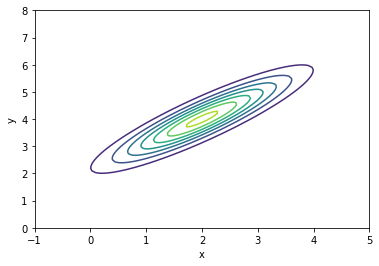

In [5]:
# Create log pdf
mean = [2, 4]
cov = [[1, 0.9], [0.9, 1]]
log_pdf = pints.toy.GaussianLogPDF(mean, cov)

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-1, 5, num_points)
y = np.linspace(-0, 8, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's run the Neal Langevin Method without momentum persistance first (alpha = 0)

In [6]:
# Choose starting points for 3 mcmc chains
xs = [
    [2, 1],
    [3, 3],
    [5, 4],
]

# Set a standard deviation, to give the method a sense of scale
#sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.NealLangevinMCMC)

# Add stopping criterion
mcmc.set_max_iterations(5000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.5)
    sampler.set_alpha(0)
    sampler.set_delta(mean=0.05)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Neal Langevin MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.333     0.333     0.333      0:00.0
2     9      0.5       0.5       0.5        0:00.0
3     12     0.6       0.6       0.6        0:00.0
100   303    0.971     0.971     0.971      0:00.1
200   603    0.985     0.980198  0.985      0:00.1
300   903    0.986755  0.986755  0.983      0:00.2
400   1203   0.985     0.985     0.985      0:00.3
500   1503   0.982     0.982     0.988      0:00.4
600   1803   0.982     0.985     0.986711   0:00.5
700   2103   0.982906  0.984     0.985755   0:00.5
800   2403   0.983     0.985     0.986      0:00.6
900   2703   0.982     0.986     0.988      0:00.7
1000  3003   0.982     0.987     0.987      0:00.7
1100  3303   0.982     0.986     0.986      0:00.8
1200  3603   0.982     0.988     0.987      0:00.9
1300  3903   0.982     0.988     0.988      0:01

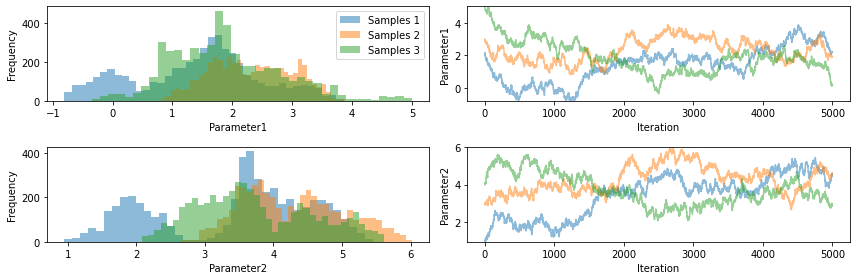

In [7]:
# Show traces and histograms
import pints.plot
pints.plot.trace(full_chains)
plt.show()

R-hat:
[1.3552733351602346, 1.3754582405932707]
0.17671921652229416
0.18796827770391555
0.12155430637222131


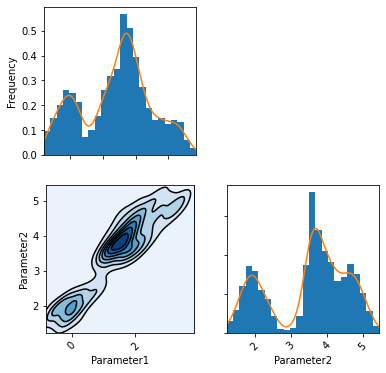

In [8]:
# Discard warm up
chains = full_chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

The chains don't seem to have converged! This is because the narrow peak is very difficult to explore, for a fixed step size epsilon and a random momentum for every iteration. If the momentum were to persistant to some degree instead, we might hope to explore the high posterior regions for effectively.

So let's turn on the persistance of the momentum (alpha = 0.95).

In [9]:
# Choose starting points for 3 mcmc chains
xs = [
    [2, 1],
    [3, 3],
    [5, 4],
]

# Set a standard deviation, to give the method a sense of scale
#sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.NealLangevinMCMC)

# Add stopping criterion
mcmc.set_max_iterations(5000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.5)
    sampler.set_alpha(0.95)
    sampler.set_delta(mean=0.05)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Neal Langevin MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.333     0.333     0.333      0:00.0
2     9      0.5       0.5       0.5        0:00.0
3     12     0.6       0.6       0.6        0:00.0
100   303    0.98      0.98      0.971      0:00.1
200   603    0.985     0.985     0.985      0:00.2
300   903    0.983     0.983     0.98       0:00.2
400   1203   0.985     0.988     0.983      0:00.3
500   1503   0.986     0.986     0.984      0:00.4
600   1803   0.986711  0.986711  0.983      0:00.4
700   2103   0.985755  0.988604  0.984      0:00.5
800   2403   0.986     0.989     0.985      0:00.6
900   2703   0.987     0.988     0.984      0:00.6
1000  3003   0.988024  0.989022  0.986      0:00.7
1100  3303   0.987     0.988     0.986      0:00.8
1200  3603   0.988     0.988     0.987      0:00.8
1300  3903   0.988     0.988     0.987      0:00

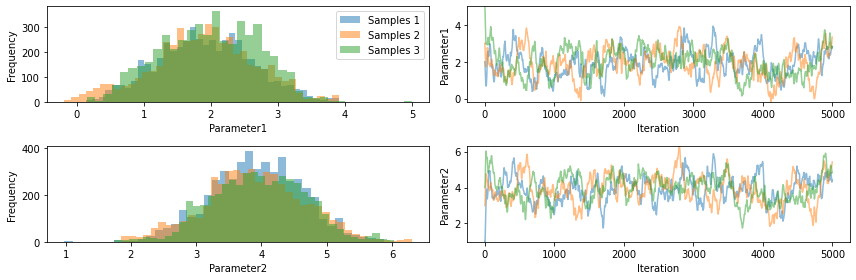

In [10]:
# Show traces and histograms
import pints.plot
pints.plot.trace(full_chains)
plt.show()

R-hat:
[1.0113954178762339, 1.007984065285739]
0.22677203821858427
0.12450143877137254
0.22622582498477395


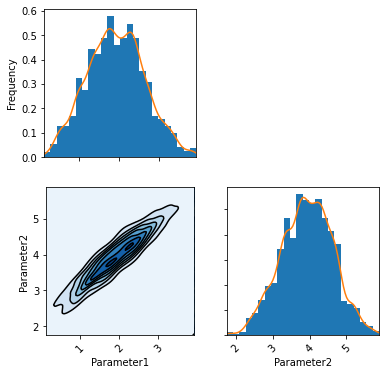

In [11]:
# Discard warm up
chains = full_chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

<a id='gradualu'></a>The chains seem to have converged much better! The persistance of the momentum helps to explore the narrow peak of the pdf.

The novelty of the Neal Langevin sampler is also a clustering of the rejections by slowly updated the required acceptance ratio u. By setting the mean update to zero and the variance to a large number, we effectively recover a unform sample of u in [0, 1]. As a result the rejections will no longer be clustered. Let us explore how this will effect the convergence behaviour of the sampler for otherwise fixed parameters.

In [12]:
# Choose starting points for 3 mcmc chains
xs = [
    [2, 1],
    [3, 3],
    [5, 4],
]

# Set a standard deviation, to give the method a sense of scale
#sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 3, xs, method=pints.NealLangevinMCMC)

# Add stopping criterion
mcmc.set_max_iterations(5000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(100)

# # Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.5)
    sampler.set_alpha(0.95)
    sampler.set_delta(mean=0, sigma=10)

# Run!
print('Running...')
full_chains = mcmc.run()
print('Done!')

Running...
Using Neal Langevin MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.333     0.333     0.333      0:00.0
2     9      0.5       0.5       0.5        0:00.0
3     12     0.6       0.6       0.6        0:00.0
100   303    0.98      0.98      0.98       0:00.1
200   603    0.990099  0.990099  0.990099   0:00.2
300   903    0.993     0.993     0.993      0:00.3
400   1203   0.995     0.995     0.995      0:00.3
500   1503   0.996     0.996     0.996      0:00.4
600   1803   0.997     0.997     0.997      0:00.5
700   2103   0.997151  0.997151  0.997151   0:00.6
800   2403   0.998     0.998     0.998      0:00.6
900   2703   0.998     0.998     0.997      0:00.7
1000  3003   0.997006  0.998004  0.997006   0:00.8
1100  3303   0.997     0.998     0.997      0:00.9
1200  3603   0.998     0.998     0.998      0:00.9
1300  3903   0.998     0.998     0.998      0:01

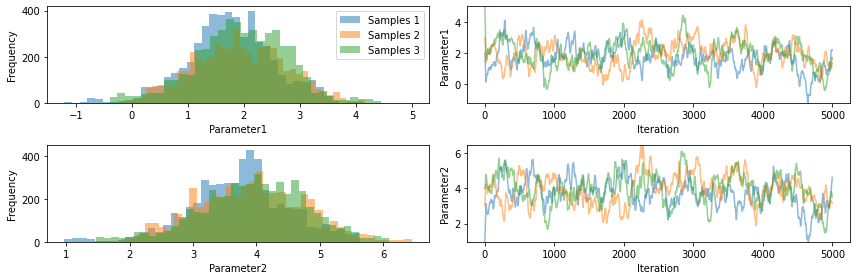

In [13]:
# Show traces and histograms
import pints.plot
pints.plot.trace(full_chains)
plt.show()

R-hat:
[1.0514614977716135, 1.0496007923779316]
0.17344244362561234
0.15020101719994083
0.1366455438681189


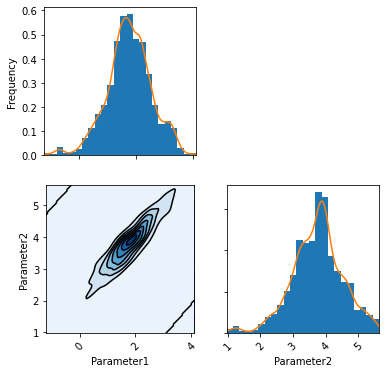

In [14]:
# Discard warm up
chains = full_chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

We see that sampling u approximately uniformly from the interval \[0, 1\] at each MCMC iteration still recovers the high probability regions of the pdf reasonably well. It seems, however, that in comparison to before [11](#gradualu) the tails are less extensively explored. This is because the gradual updating of u clusters rejections of proposals (if u is close to 1, more proposals are rejected), while the total amount of rejections for each chain remains the same (u assumes values in \[0, 1\] uniformly for both updating strategies). As a result, clustered rejections, lead to a better exporation of the space, which is in this case illustrated by a better sampling of the tails. For more information, see [Neal Langevin MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).